# Code To Extract Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
data

{'status': {'timestamp': '2023-11-10T17:59:08.985Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 20,
  'credit_count': 1,
  'notice': None,
  'total_count': 8819},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 10551,
   'date_added': '2010-07-13T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio

In [3]:
type(data)

dict

# Converting Extracted Data Into A Data Frame.

In [4]:
import pandas as pd
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953848e+07,1.953848e+07,...,51.4617,7.816088e+11,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
1,1027,Ethereum,ETH,ethereum,7749,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202636e+08,1.202636e+08,...,17.8409,2.521121e+11,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
2,825,Tether USDt,USDT,tether,65524,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.651725e+10,8.962366e+10,...,6.1270,8.965327e+10,None,2023-11-10T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-10 17:59:09.402838
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517020e+08,1.517020e+08,...,2.6958,3.809499e+10,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,...,2.4988,6.581348e+10,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
5,3408,USDC,USDC,usd-coin,14863,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.402508e+10,2.402508e+10,...,1.7010,2.402769e+10,None,2023-11-10T17:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-10 17:59:09.402838
6,5426,Solana,SOL,solana,545,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.210168e+08,5.621186e+08,...,1.5632,2.948067e+10,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
7,2010,Cardano,ADA,cardano,970,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.526524e+10,3.633522e+10,...,0.9329,1.681443e+10,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
8,74,Dogecoin,DOGE,dogecoin,822,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.417745e+11,1.417745e+11,...,0.7435,1.050252e+10,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838
9,1958,TRON,TRX,tron,868,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, dwf-labs-por...",NaN,8.870969e+10,8.870980e+10,...,0.6623,9.359356e+09,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838


# Function to Automate The Extracting Process.

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [6]:
import os 
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print('API Runner completed')
    #sleep(60) #sleep for 6 sec
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953848e+07,1.953848e+07,...,7.816088e+11,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
1,1027,Ethereum,ETH,ethereum,7749,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202636e+08,1.202636e+08,...,2.521121e+11,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
2,825,Tether USDt,USDT,tether,65524,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.651725e+10,8.962366e+10,...,8.965327e+10,None,2023-11-10T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-10 17:59:09.402838,NaT
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517020e+08,1.517020e+08,...,3.809499e+10,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.365277e+10,9.998824e+10,...,6.581348e+10,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11419,Toncoin,TON,toncoin,171,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3.431892e+09,5.047559e+09,...,1.235164e+10,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974
11,1975,Chainlink,LINK,chainlink,1420,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1.000000e+09,5.568500e+08,1.000000e+09,...,1.510210e+10,None,2023-11-10T17:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,NaT,2023-11-10 17:59:17.701974
12,3890,Polygon,MATIC,polygon,1051,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.000000e+10,9.249796e+09,1.000000e+10,...,8.329515e+09,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974
13,6636,Polkadot,DOT,polkadot-new,611,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.275842e+09,1.376173e+09,...,7.053639e+09,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974


# Data Cleaning.

In [8]:
# To change scientific notation and be able to see the numbers.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10551,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19538481.00000,19538481.00000,...,781608808479.94995,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
1,1027,Ethereum,ETH,ethereum,7749,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120263563.63084,120263563.63084,...,252112060150.64999,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
2,825,Tether USDt,USDT,tether,65524,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86517250035.31322,89623656723.43338,...,89653273148.12000,None,2023-11-10T17:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-10 17:59:09.402838,NaT
3,1839,BNB,BNB,bnb,1753,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702011.29825,151702011.29825,...,38094992885.95000,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
4,52,XRP,XRP,xrp,1139,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53652766196.00000,99988240531.00000,...,65813482026.22000,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-10 17:59:09.402838,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11419,Toncoin,TON,toncoin,171,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3431892087.62000,5047558528.00000,...,12351641509.99000,None,2023-11-10T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974
11,1975,Chainlink,LINK,chainlink,1420,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.00000,556849970.45279,1000000000.00000,...,15102103776.36000,None,2023-11-10T17:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,NaT,2023-11-10 17:59:17.701974
12,3890,Polygon,MATIC,polygon,1051,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",10000000000.00000,9249796412.91756,10000000000.00000,...,8329515081.29000,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974
13,6636,Polkadot,DOT,polkadot-new,611,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1275841811.34891,1376173397.41171,...,7053639292.75000,None,2023-11-10T17:57:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-11-10 17:59:17.701974


In [10]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45553,1.58049,8.08656,39.75521,47.70438,26.50406
Ethereum,-0.01680,3.44170,16.06915,34.89154,34.13697,13.41728
Tether USDt,-0.00688,0.01673,-0.02481,0.06081,0.06358,0.07811
BNB,0.09663,1.49568,10.08258,22.45351,21.41075,4.36361
XRP,0.12335,-0.53049,8.66452,35.29778,39.09867,4.55035
USDC,-0.00668,0.04120,-0.00593,0.00898,-0.00323,-0.00721
Solana,0.95583,15.39107,34.62692,140.17790,195.08245,112.50102
Cardano,-0.17095,1.76522,17.94535,51.54919,54.55758,27.57123
Dogecoin,-0.15981,3.05939,9.96394,27.77492,22.92931,-3.58733


In [11]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h    -0.45553
                 quote.USD.percent_change_24h    1.58049
                 quote.USD.percent_change_7d     8.08656
                 quote.USD.percent_change_30d   39.75521
                 quote.USD.percent_change_60d   47.70438
                                                  ...   
Wrapped Bitcoin  quote.USD.percent_change_24h    2.11112
                 quote.USD.percent_change_7d     7.88592
                 quote.USD.percent_change_30d   39.73772
                 quote.USD.percent_change_60d   48.03031
                 quote.USD.percent_change_90d   26.52741
Length: 90, dtype: float64

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                                 
Bitcoin         quote.USD.percent_change_1h  -0.45553
                quote.USD.percent_change_24h  1.58049
                quote.USD.percent_change_7d   8.08656
                quote.USD.percent_change_30d 39.75521
                quote.USD.percent_change_60d 47.70438
...                                               ...
Wrapped Bitcoin quote.USD.percent_change_24h  2.11112
                quote.USD.percent_change_7d   7.88592
                quote.USD.percent_change_30d 39.73772
                quote.USD.percent_change_60d 48.03031
                quote.USD.percent_change_90d 26.52741

[90 rows x 1 columns]

In [14]:
df5.count()

values    90
dtype: int64

In [17]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.

df6 =df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45553
1,Bitcoin,quote.USD.percent_change_24h,1.58049
2,Bitcoin,quote.USD.percent_change_7d,8.08656
3,Bitcoin,quote.USD.percent_change_30d,39.75521
4,Bitcoin,quote.USD.percent_change_60d,47.70438
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,2.11112
86,Wrapped Bitcoin,quote.USD.percent_change_7d,7.88592
87,Wrapped Bitcoin,quote.USD.percent_change_30d,39.73772
88,Wrapped Bitcoin,quote.USD.percent_change_60d,48.03031


In [18]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45553
1,Bitcoin,quote.USD.percent_change_24h,1.58049
2,Bitcoin,quote.USD.percent_change_7d,8.08656
3,Bitcoin,quote.USD.percent_change_30d,39.75521
4,Bitcoin,quote.USD.percent_change_60d,47.70438
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,2.11112
86,Wrapped Bitcoin,quote.USD.percent_change_7d,7.88592
87,Wrapped Bitcoin,quote.USD.percent_change_30d,39.73772
88,Wrapped Bitcoin,quote.USD.percent_change_60d,48.03031


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.45553
1,Bitcoin,24h,1.58049
2,Bitcoin,7d,8.08656
3,Bitcoin,30d,39.75521
4,Bitcoin,60d,47.70438
...,...,...,...
85,Wrapped Bitcoin,24h,2.11112
86,Wrapped Bitcoin,7d,7.88592
87,Wrapped Bitcoin,30d,39.73772
88,Wrapped Bitcoin,60d,48.03031


# Visualising

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

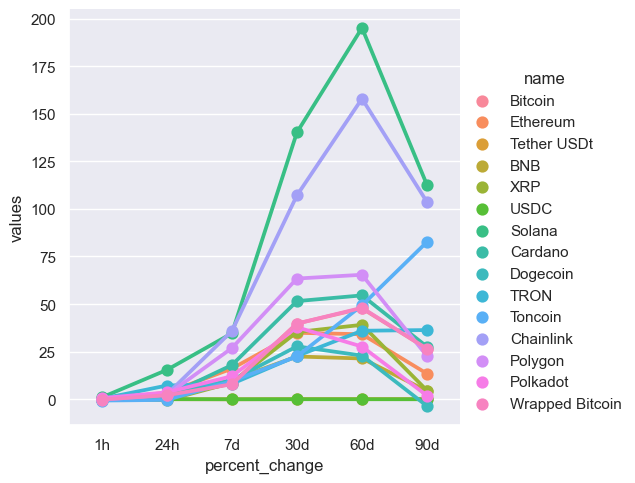

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')